In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

C:\Users\USER\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\USER\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\USER\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\USER\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\USER\Anac

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

#from sklearn.preprocessing import imputation
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import  Lasso, Ridge, ElasticNet
#from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
#from sklearn.manifold import TSNE
#from sklearn.cluster import KMeans, DBSCAN
#from sklearn.svm import SVR
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
car_sales = pd.read_csv('Car_sales.csv')

In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [5]:
car_sales.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [7]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [8]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(car_sales)

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


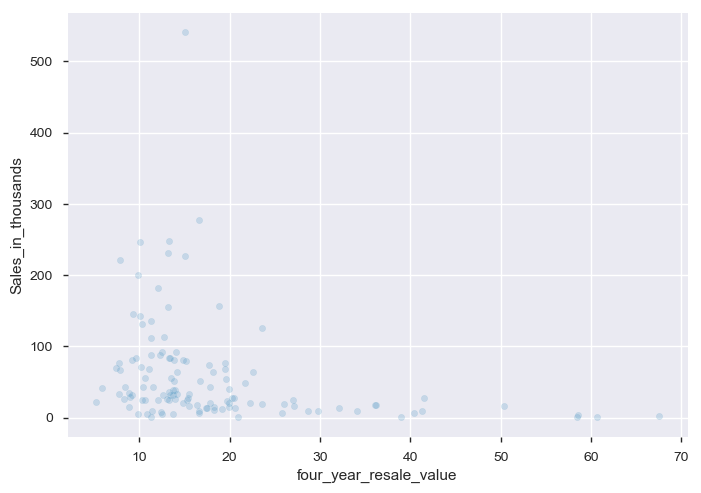

In [9]:
# Pandas scatter plot
car_sales.plot(kind='scatter', x='four_year_resale_value', y='Sales_in_thousands', alpha=0.2)

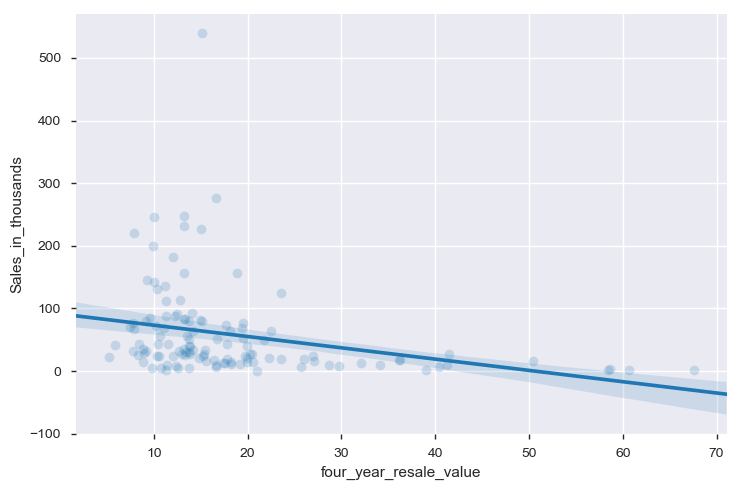

In [10]:
# Seaborn scatter plot with regression line
sns.lmplot(x='four_year_resale_value', y='Sales_in_thousands', data=car_sales, aspect=1.5, scatter_kws={'alpha':0.2})

In [12]:
dict(car_sales.dtypes)

{'Manufacturer': dtype('O'),
 'Model': dtype('O'),
 'Sales_in_thousands': dtype('float64'),
 'four_year_resale_value': dtype('float64'),
 'Vehicle_type': dtype('O'),
 'Price_in_thousands': dtype('float64'),
 'Engine_size': dtype('float64'),
 'Horsepower': dtype('float64'),
 'Wheelbase': dtype('float64'),
 'Width': dtype('float64'),
 'Length': dtype('float64'),
 'Curb_weight': dtype('float64'),
 'Fuel_capacity': dtype('float64'),
 'Fuel_efficiency': dtype('float64'),
 'Latest_Launch': dtype('O'),
 'Power_perf_factor': dtype('float64')}

In [13]:
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object', 'O']]
print(numeric_var_names)
print(cat_var_names)

['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [14]:
car_sales_num=car_sales[numeric_var_names]
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [15]:
car_sales_cat = car_sales[cat_var_names]
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [16]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [17]:
car_sales_num.apply(var_summary)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
NMISS,0.000000,36.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000
SUM,8320.698000,2186.830000,4245.567000,477.500000,29008.000000,16768.000000,11099.400000,29225.600000,523.594000,2800.500000,3672.000000,11941.756636
MEAN,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
MEDIAN,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
STD,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
VAR,4628.002257,131.180007,205.969949,1.091300,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558
CV,1.283621,0.633730,0.523960,0.341290,0.304925,0.071090,0.048515,0.071696,0.186648,0.216574,0.179612,0.326343
MIN,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
P1,0.937280,6.173000,10.231440,1.555000,96.400000,92.875000,66.085000,154.915000,2.245400,11.900000,15.000000,38.461920


In [18]:
num_summary=car_sales_num.apply(var_summary).T

In [19]:
num_summary.to_csv('num_summary.csv')

In [20]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,1.283621,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,0.633730,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,0.523960,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,0.341290,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,0.304925,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,0.071090,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,0.048515,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,0.071696,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,0.186648,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,0.216574,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [21]:
car_sales_cat=car_sales.select_dtypes(include=['object'])

In [22]:
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [23]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=car_sales_cat.apply(lambda x: cat_summary(x))

In [24]:
cat_summary

,Manufacturer,Model,Vehicle_type,Latest_Launch
N,157,157,157,157
NMISS,0,0,0,0
ColumnsNames,Ford 11 Dodge 11 Chevrolet ...,Neon 2 Crown Victoria 1 Wrangl...,Passenger 116 Car 41 Name: Vehicl...,10/20/2009 2 8/16/2012 2 4/11/2011 ...


In [25]:
car_sales['Sales_in_thousands'].quantile(0.99)

260.64531999999997

In [26]:
car_sales['Sales_in_thousands'].quantile(0.01)

0.9372799999999999

In [ ]:
#Handling Outliers - Method1
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_upper(car_sales['Sales_in_thousands'].quantile(0.99)) 
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_lower(car_sales['Sales_in_thousands'].quantile(0.01)) 


In [ ]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

In [27]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

car_sales_num=car_sales_num.apply(lambda x: outlier_capping(x))

In [28]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,1.129204,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,253.560581,260.645320
four_year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,0.620496,6.17300,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,0.514622,10.23144,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,0.322052,1.55500,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Horsepower,156.0,1.0,28910.300000,185.322436,177.500000,52.816470,2789.579526,0.284998,96.40000,98.380000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,317.087500,325.750000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,0.069104,92.87500,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,0.047637,66.08500,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,0.070038,154.91500,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,0.184000,2.24540,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,0.212828,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000


In [ ]:
#Handling Missings
# Fill with mean
car_sales['Sales_in_thousands']=car_sales['Sales_in_thousands'].fillna(car_sales['Sales_in_thousands'].mean())

In [ ]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

In [29]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

car_sales_num=car_sales_num.apply(lambda x: Missing_imputation(x))

In [30]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,1.129204,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,253.560581,260.645320
four_year_resale_value,157.0,0.0,2690.901000,17.139497,14.180000,9.939494,98.793544,0.579918,6.17300,6.874120,8.425000,9.710000,12.545000,14.180000,18.140000,27.02500,39.275000,59.312800,60.220000
Price_in_thousands,157.0,0.0,4281.553480,27.271041,22.799000,13.982815,195.519110,0.512735,10.23144,10.485434,12.491000,13.976200,18.145000,22.799000,31.930000,43.78800,55.225000,76.514312,78.479800
Engine_size,157.0,0.0,478.810000,3.049745,3.000000,0.979133,0.958702,0.321054,1.55500,1.580200,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Horsepower,157.0,0.0,29087.800000,185.272611,177.500000,52.650616,2772.087354,0.284179,96.40000,98.416000,114.600000,120.000000,150.000000,177.500000,215.000000,253.80000,300.000000,316.930000,325.750000
Wheelbase,157.0,0.0,16867.100000,107.433758,107.000000,7.400543,54.768036,0.068885,92.87500,93.001000,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,132.485000,134.375000
Width,157.0,0.0,11173.000000,71.165605,70.550000,3.379817,11.423163,0.047492,66.08500,66.261400,66.500000,66.900000,68.400000,70.550000,73.400000,76.18000,78.200000,79.139600,79.190000
Length,157.0,0.0,29411.840000,187.336561,187.900000,13.078309,171.042158,0.069812,154.91500,156.250600,163.700000,173.120000,177.600000,187.900000,196.100000,203.34000,208.500000,217.062200,219.305000
Curb_weight,157.0,0.0,530.454160,3.378689,3.342000,0.617780,0.381652,0.182846,2.24540,2.247976,2.424000,2.612800,2.975000,3.342000,3.778000,4.11740,4.388400,5.394619,5.396680
Fuel_capacity,157.0,0.0,2817.100000,17.943312,17.200000,3.808060,14.501317,0.212227,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.396000,30.900000


In [31]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [32]:
col_dummies=pd.get_dummies(car_sales['Manufacturer'], prefix='d')
col_dummies.head(5)

,d_Acura,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
col_dummies.columns[0]

'd_Acura'

In [34]:
col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)

In [35]:
col_dummies.head(5)

,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,d_Hyundai,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type')
col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
car_sales_cat = pd.concat([car_sales_cat, col_dummies], axis=1)
car_sales_cat.drop( 'Vehicle_type', axis = 1, inplace = True )

In [37]:
car_sales_cat.head(5)

,Manufacturer,Model,Latest_Launch,Vehicle_type_Passenger
0,Acura,Integra,2/2/2012,1
1,Acura,TL,6/3/2011,1
2,Acura,CL,1/4/2012,1
3,Acura,RL,3/10/2011,1
4,Audi,A4,10/8/2011,1


In [38]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [ ]:
car_sales.info()

In [39]:
#for c_feature in categorical_features
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [40]:
car_sales_cat.head(5)

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
#car_sales=pd.concat(car_sales_num, car_sales_cat)
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)

In [42]:
car_sales_new.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


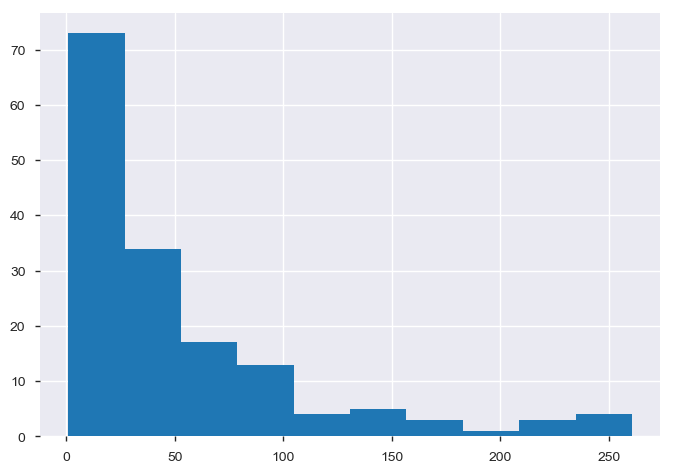

In [43]:
car_sales_new.Sales_in_thousands.hist()

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


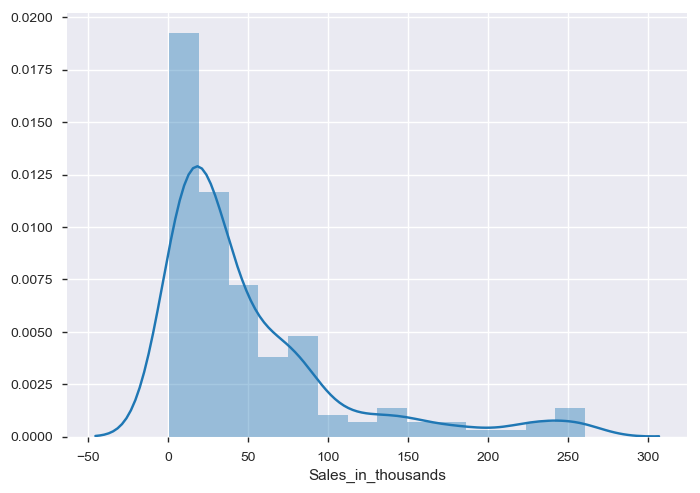

In [44]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(car_sales_new.Sales_in_thousands)

In [ ]:
np.log?

In [45]:
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"]+1)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


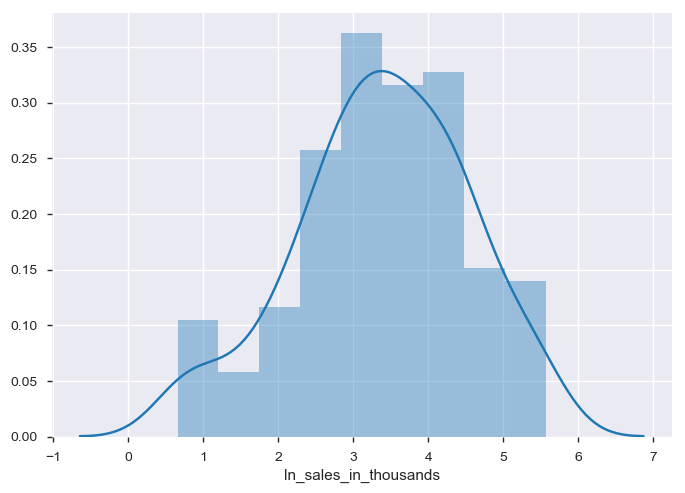

In [46]:
sns.distplot(car_sales_new.ln_sales_in_thousands)

In [47]:
#Dropping the variables
car_sales_new=car_sales_new.drop(['Sales_in_thousands'],axis=1)

In [ ]:
car_sales_new.columns

In [48]:
# correlation matrix (ranges from 1 to -1)
corrm=car_sales_new.corr()

In [49]:
corrm.to_csv('corrm.csv')

In [50]:
car_sales_new.corr()

,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
four_year_resale_value,1.000000,0.793482,0.433034,0.650285,-0.040888,0.165259,0.040030,0.276207,0.268711,-0.341003,...,-0.065511,0.517804,-0.033931,-0.097963,-0.033931,-0.018848,-0.056776,-0.059543,0.084599,-0.437248
Price_in_thousands,0.793482,1.000000,0.617601,0.847967,0.118272,0.328579,0.157225,0.526211,0.431413,-0.507150,...,-0.061809,0.352504,0.019062,-0.169161,-0.047888,-0.093559,-0.136904,0.052376,0.044229,-0.566011
Engine_size,0.433034,0.617601,1.000000,0.814995,0.518433,0.702596,0.576364,0.793321,0.698313,-0.757120,...,0.078343,0.016720,-0.104716,-0.191354,-0.063982,-0.108018,-0.221204,-0.153125,-0.278720,-0.109700
Horsepower,0.650285,0.847967,0.814995,1.000000,0.325276,0.538193,0.420399,0.637164,0.526638,-0.610719,...,-0.001035,0.231530,-0.016823,-0.226951,-0.043878,-0.115615,-0.244750,-0.011797,-0.010312,-0.393374
Wheelbase,-0.040888,0.118272,0.518433,0.325276,1.000000,0.681390,0.837535,0.656884,0.659692,-0.498976,...,0.046376,-0.260791,-0.045175,-0.083439,-0.092140,-0.093985,-0.203574,-0.085580,-0.382446,0.269422
Width,0.165259,0.328579,0.702596,0.538193,0.681390,1.000000,0.700024,0.710129,0.648637,-0.584584,...,0.042466,-0.060717,-0.073017,-0.200565,-0.110105,-0.115409,-0.187300,-0.094605,-0.239476,0.044473
Length,0.040030,0.157225,0.576364,0.420399,0.837535,0.700024,1.000000,0.622352,0.561758,-0.418688,...,0.096536,-0.149922,-0.014260,-0.061445,-0.059569,-0.103678,-0.304586,-0.059173,-0.130166,0.207925
Curb_weight,0.276207,0.526211,0.793321,0.637164,0.656884,0.710129,0.622352,1.000000,0.868023,-0.829389,...,0.007816,-0.094518,-0.044951,-0.221330,-0.020049,-0.070576,-0.161803,-0.030435,-0.518975,-0.056227
Fuel_capacity,0.268711,0.431413,0.698313,0.526638,0.659692,0.648637,0.561758,0.868023,1.000000,-0.821330,...,-0.001399,-0.034685,-0.007281,-0.260082,-0.046183,-0.011476,-0.170318,-0.005775,-0.592574,-0.018434
Fuel_efficiency,-0.341003,-0.507150,-0.757120,-0.610719,-0.498976,-0.584584,-0.418688,-0.829389,-0.821330,1.000000,...,0.053712,-0.062668,-0.022199,0.304881,0.021007,0.090764,0.121107,0.036863,0.597855,0.128691


In [ ]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

#### What relationships do you notice?

In [ ]:
#Splitting the data

feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] )
feature_columns

In [ ]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['ln_sales_in_thousands'],
                                                  test_size = 0.3,
                                                  random_state = 1234 )

In [ ]:
print len( train_X )
print len( test_X)

In [51]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split( car_sales_new,test_size = 0.3,random_state = 123 )

In [53]:
len(train)

109

In [52]:
len(test)

48

## Building a linear regression model

In [54]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(car_sales_new,test_size=0.3,random_state = 123 ) 

In [55]:
import statsmodels.formula.api as smf

In [ ]:
#Linear_model = smf.ols('y~X1+X2+X3..+Xn', data=train)
#Linear_model.fit()

In [56]:
lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

In [58]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.593
Model:                               OLS   Adj. R-squared:                  0.547
Method:                    Least Squares   F-statistic:                     12.84
Date:                   Sun, 09 Sep 2018   Prob (F-statistic):           1.12e-14
Time:                           16:55:33   Log-Likelihood:                -123.48
No. Observations:                    109   AIC:                             271.0
Df Residuals:                         97   BIC:                             303.3
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [77]:
lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+Engine_size+Wheelbase+Fuel_efficiency+Vehicle_type_Passenger', train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.570
Model:                               OLS   Adj. R-squared:                  0.549
Method:                    Least Squares   F-statistic:                     27.34
Date:                   Sun, 09 Sep 2018   Prob (F-statistic):           1.63e-17
Time:                           17:06:23   Log-Likelihood:                -126.43
No. Observations:                    109   AIC:                             264.9
Df Residuals:                        103   BIC:                             281.0
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Mathematical equation:
ln_sales_in_thousands = -2.5129 - 0.0558 * Price_in_thousands + 0.3565* Engine_size + 0.0426*Wheelbase+ 0.1010*Fuel_efficiency -Vehicle_type_Passenger*0.7385

sales_in_thousands = exp(ln_sales_in_thousands)

In [71]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_MercedesB',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sa

In [72]:
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] ))

print(all_columns)

Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [73]:
my_formula = "ln_sales_in_thousands~" + all_columns

print(my_formula)

ln_sales_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [74]:
import statsmodels.formula.api as smf

lm=smf.ols(formula=my_formula, data=train).fit()
#lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

In [76]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.783
Model:                               OLS   Adj. R-squared:                  0.660
Method:                    Least Squares   F-statistic:                     6.367
Date:                   Sun, 09 Sep 2018   Prob (F-statistic):           1.53e-11
Time:                           17:05:48   Log-Likelihood:                -89.307
No. Observations:                    109   AIC:                             258.6
Df Residuals:                         69   BIC:                             366.3
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
test.columns

In [78]:
lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+Engine_size+Wheelbase+Fuel_efficiency+Vehicle_type_Passenger', train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.570
Model:                               OLS   Adj. R-squared:                  0.549
Method:                    Least Squares   F-statistic:                     27.34
Date:                   Sun, 09 Sep 2018   Prob (F-statistic):           1.63e-17
Time:                           17:08:14   Log-Likelihood:                -126.43
No. Observations:                    109   AIC:                             264.9
Df Residuals:                        103   BIC:                             281.0
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [79]:
pred = lm.predict(test)
pred.head(5)

24     2.899703
23     3.573083
138    3.576991
87     4.097338
134    3.303561
dtype: float64

In [83]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test.ln_sales_in_thousands, pred))
print('MSE:', metrics.mean_squared_error(test.ln_sales_in_thousands, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_sales_in_thousands, pred)))
#print 'R-Squre:', metrics.r2_score(test.ln_sales_in_thousands, pred)

MAE: 0.7355958070594718
MSE: 0.8917832718573436
RMSE: 0.9443427724387706


In [84]:
pred = lm.predict(train)
pred.head(5)

45     4.497208
129    4.521281
79     3.828046
153    3.059319
35     4.154400
dtype: float64

In [88]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train.ln_sales_in_thousands, pred))
print('MSE:', metrics.mean_squared_error(train.ln_sales_in_thousands, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_sales_in_thousands, pred)))

MAE: 0.6077286340639274
MSE: 0.595678931892303
RMSE: 0.7718023917378742


## Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> - R-squared = Explained variation / Total variation <br>
> - Total variation is variation of response variable around it's mean. <br>

> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
while 100% signifies that the model explains all the variability of the response. <br>
The closer the r-square to 100%, the better is the model. <br>

## Other Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
import statsmodels as sm

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [ ]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_sales_in_thousands~Price_in_thousands+Wheelbase+Manufacturer_Ford+Vehicle_type_Passenger', train, return_type='dataframe')

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [ ]:
vif.round(1)

In [ ]:
X.head(5)

In [ ]:
lm1=smf.ols('ln_sales_in_thousands~Price_in_thousands+Engine_size+Vehicle_type_Passenger', train).fit()

In [ ]:
lm1.summary()

In [ ]:
train['y_pred_train'] = lm1.predict(train)

In [ ]:
train.head(5)

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(train.ln_sales_in_thousands, train.y_pred_train)
print 'MSE:', metrics.mean_squared_error(train.ln_sales_in_thousands, train.y_pred_train)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_sales_in_thousands, train.y_pred_train))

In [ ]:
test['y_pred_test'] = lm1.predict(test)

In [ ]:
test.head(5)

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test.ln_sales_in_thousands, test.y_pred_test)
print 'MSE:', metrics.mean_squared_error(test.ln_sales_in_thousands, test.y_pred_test)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_sales_in_thousands, test.y_pred_test))

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [ ]:
train['y_pred_train'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
train['Deciles']=pd.qcut(train['y_pred_train'],10, labels=False)
test['Deciles']=pd.qcut(test['y_pred_test'],10, labels=False)

In [ ]:
train.head(5)

In [ ]:
test.head(5)

In [ ]:
train[['Deciles','ln_sales_in_thousands', 'y_pred_train']].groupby(train.Deciles).mean()

In [ ]:
test[['Deciles','ln_sales_in_thousands', 'y_pred_test']].groupby(test.Deciles).mean()

In [ ]:
sns.distplot(lm1.resid)

In [ ]:
sns.jointplot(car_sales_new.ln_sales_in_thousands, lm1.predict(car_sales_new) )

### USING sklearn Library to build the model
> sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [ ]:
train_X

In [ ]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

In [ ]:
linreg.coef_

In [ ]:
linreg.score(train_X, train_y)

In [ ]:
linreg.score?

In [ ]:
dir(linreg)

In [ ]:
y_pred_t = linreg.predict(train_X)
y_pred_t

In [ ]:
pd.concat([train_y, pred],axis=1).corr()

In [ ]:
metrics.r2_score?

In [ ]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print rmse_t
print metrics.r2_score( train_y, y_pred_t )

In [ ]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print rmse
print metrics.r2_score( test_y, y_pred )

In [ ]:
residuals = train_y - y_pred_t

In [ ]:
sns.jointplot(  train_y, residuals )

In [ ]:
sns.distplot( residuals )

In [ ]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [ ]:
### K-FOLD CROSS VALIDATION
from sklearn.cross_validation import cross_val_score

In [ ]:
linreg = LinearRegression()

In [ ]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 10 )

In [ ]:
cross_val_score?

In [ ]:
round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

In [ ]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [ ]:
F_values, p_values  = f_regression(  train_X, train_y )

In [ ]:
F_values

In [ ]:
['%.3f' % p for p in p_values]

As p - values are less than 5% - the variables are siginificant in the regression equation.

## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions